# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# K-Nearest Neighbors

### standardizer

In [6]:
time1_knn_0 = datetime.datetime.now()
# Train a KNN classifier with 5 neighbors
knn_0 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn_0)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=1).fit(X_std_train, y_train)

# Best neighborhood size (k)
print(classifier.best_estimator_.get_params()["knn__n_neighbors"])

knn_0 = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()["knn__n_neighbors"], n_jobs=-1)

model = knn_0.fit(X_std_train, y_train)
y_pred_knn_0 = knn_0.predict(X_std_test)
y_probs_knn_0 = knn_0.predict_proba(X_std_test)[:, 1]
time2_knn_0 = datetime.datetime.now()
print_score(y_test,y_pred_knn_0,time1_knn_0 ,time2_knn_0)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


6
comfusion matrix = 
[[2633  191]
 [ 207 4062]]

accuracy_score =  0.9438883406175103

completeness =  0.9515108924806747
contamination =  0.04490947566423701

precision score =  0.955090524335763
recall score =  0.9515108924806747

F1 score =  0.9532973480403663

time span=  0:01:20.051219


### normal data

In [7]:
time1_knn_1 = datetime.datetime.now()

# Train a KNN classifier with 5 neighbors
knn_1 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

pipe = Pipeline([ ("knn", knn_1)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=1).fit(X_train, y_train)

knn_1 = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()["knn__n_neighbors"], n_jobs=-1)

# Best neighborhood size (k)
print(classifier.best_estimator_.get_params()["knn__n_neighbors"])

model = knn_1.fit(X_train, y_train)
y_pred_knn_1 = knn_1.predict(X_test)
y_probs_knn_1 = knn_1.predict_proba(X_test)[:, 1]
time2_knn_1 = datetime.datetime.now()
print_score(y_test,y_pred_knn_1,time1_knn_1 ,time2_knn_1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.2s finished


6
comfusion matrix = 
[[2464  360]
 [ 475 3794]]

accuracy_score =  0.8822783025518116

completeness =  0.8887327242914032
contamination =  0.08666345690900337

precision score =  0.9133365430909967
recall score =  0.8887327242914032

F1 score =  0.900866674581503

time span=  0:00:41.783971


### weight

In [8]:
time1_knn_2 = datetime.datetime.now()

# Train a KNN classifier with 5 neighbors
knn_2 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1,weights="distance")
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn_2)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=1).fit(X_std_train, y_train)

# Best neighborhood size (k)
print(classifier.best_estimator_.get_params()["knn__n_neighbors"])

knn_2 = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()["knn__n_neighbors"], n_jobs=-1,weights="distance")

model = knn_2.fit(X_std_train, y_train)
y_pred_knn_2 = knn_2.predict(X_std_test)
y_probs_knn_2 = knn_2.predict_proba(X_std_test)[:, 1]
time2_knn_2 = datetime.datetime.now()
print_score(y_test,y_pred_knn_2,time1_knn_2 ,time2_knn_2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


6
comfusion matrix = 
[[2573  251]
 [ 161 4108]]

accuracy_score =  0.941914563654307

completeness =  0.9622862497071913
contamination =  0.05758201422344574

precision score =  0.9424179857765542
recall score =  0.9622862497071913

F1 score =  0.9522484932777004

time span=  0:01:16.297307


In [9]:
time1_knn_3 = datetime.datetime.now()

# Train a KNN classifier with 5 neighbors
knn_3 = KNeighborsClassifier(n_neighbors=5, n_jobs=-1,weights="distance")
# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn_3)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
    pipe, search_space, cv=5, verbose=1).fit(X_train, y_train)

# Best neighborhood size (k)
print(classifier.best_estimator_.get_params()["knn__n_neighbors"])

knn_3 = KNeighborsClassifier(n_neighbors=classifier.best_estimator_.get_params()["knn__n_neighbors"], n_jobs=-1,weights="distance")

model = knn_3.fit(X_train, y_train)
y_pred_knn_3 = knn_3.predict(X_test)
y_probs_knn_3 = knn_3.predict_proba(X_test)[:, 1]
time2_knn_3 = datetime.datetime.now()
print_score(y_test,y_pred_knn_3,time1_knn_3 ,time2_knn_3)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


6
comfusion matrix = 
[[2362  462]
 [ 346 3923]]

accuracy_score =  0.8860848724094177

completeness =  0.9189505739048958
contamination =  0.10535917901938427

precision score =  0.8946408209806157
recall score =  0.9189505739048958

F1 score =  0.9066327709729604

time span=  0:01:14.229520


## Plot Neighbors

In [10]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,n_jobs=-1)
    clf.fit(X_std_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_std_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_std_test, y_test))

<IPython.core.display.Javascript object>


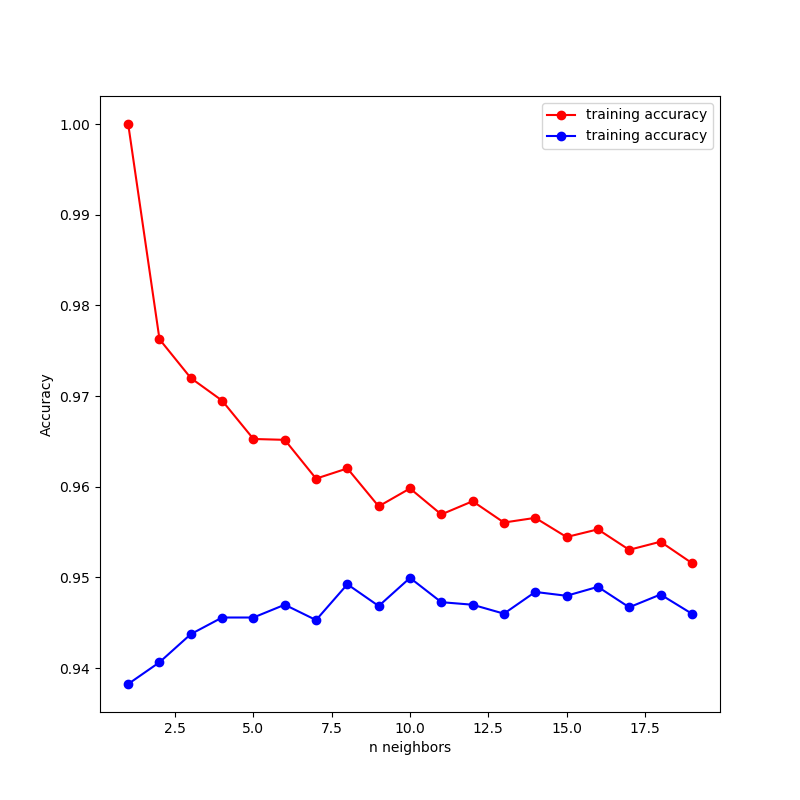

In [11]:
fig, axes = plt.subplots(figsize=(8, 8))
axes.plot(neighbors_settings, training_accuracy, 'ro-', label="training accuracy")
axes.plot(neighbors_settings, test_accuracy, 'bo-', label="training accuracy")
axes.set_ylabel("Accuracy")
axes.set_xlabel("n neighbors")
axes.legend()
plt.show()

## Feature Importance

<IPython.core.display.Javascript object>


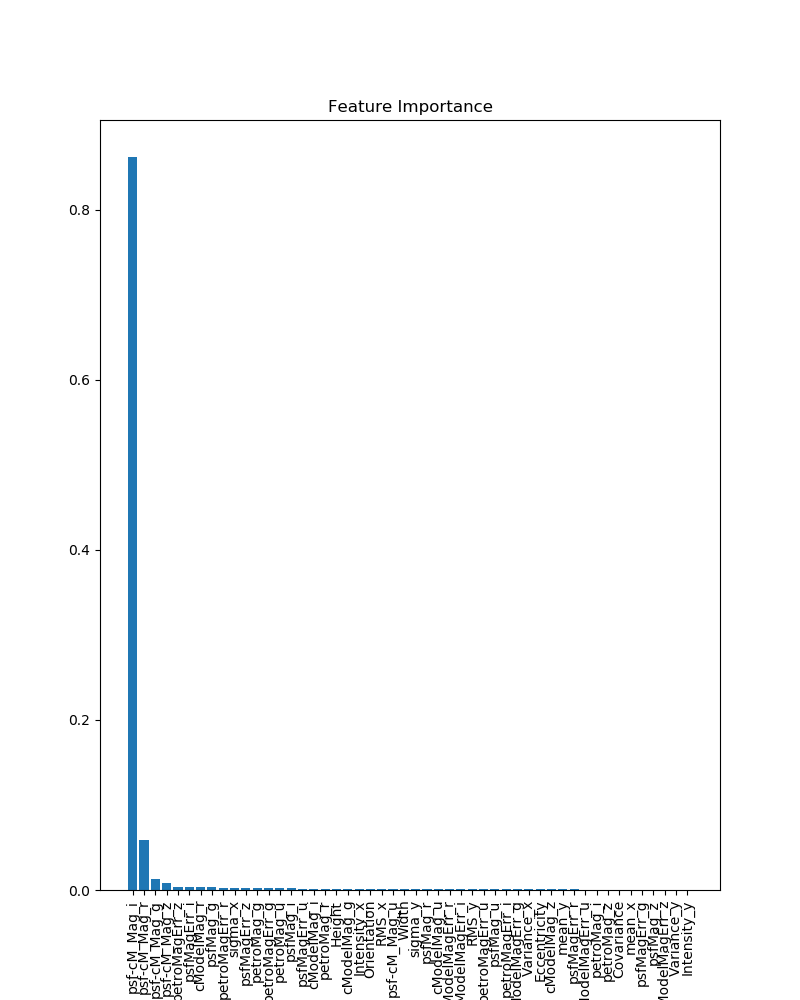

In [102]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


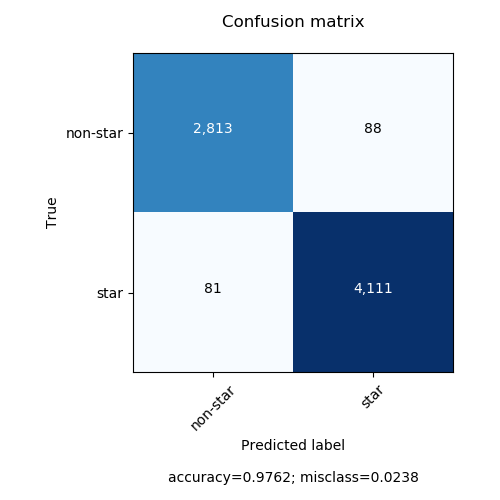

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [10]:
score_knn_0 = score(y_test,y_pred_knn_0,time1_knn_0,time2_knn_0)
score_knn_1 = score(y_test,y_pred_knn_1,time1_knn_1 ,time2_knn_1)
score_knn_2 = score(y_test,y_pred_knn_2,time1_knn_2 ,time2_knn_2)
score_knn_3 = score(y_test,y_pred_knn_3,time1_knn_3 ,time2_knn_3)

In [11]:
m1_t = pd.DataFrame({
 'accuracy' : [score_knn_0[1],score_knn_1[1],score_knn_2 [1],score_knn_3[1]],
 'completeness' : [score_knn_0[2],score_knn_1[2],score_knn_2 [2],score_knn_3[2]],
 'contamination' : [score_knn_0[3],score_knn_1[3],score_knn_2 [3],score_knn_3[3]],
 'precision' : [score_knn_0[4],score_knn_1[4],score_knn_2 [4],score_knn_3[4]],
 'recall' : [score_knn_0[5],score_knn_1[5],score_knn_2 [5],score_knn_3[5]],
 'F1 score' : [score_knn_0[6],score_knn_1[6],score_knn_2 [6],score_knn_3[6]],
 'time span' : [score_knn_0[7],score_knn_1[7],score_knn_2 [7],score_knn_3[7]]
                })

m1_t.rename(index = {0: "knn_0", 
                     1: "knn_1",
                     2: "knn_2",
                     3: "knn_3"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
knn_0,0.943888,0.951511,0.044909,0.955091,0.951511,0.953297,00:01:20.051219
knn_1,0.882278,0.888733,0.086663,0.913337,0.888733,0.900867,00:00:41.783971
knn_2,0.941915,0.962286,0.057582,0.942418,0.962286,0.952248,00:01:16.297307
knn_3,0.886085,0.918951,0.105359,0.894641,0.918951,0.906633,00:01:14.229520


<IPython.core.display.Javascript object>


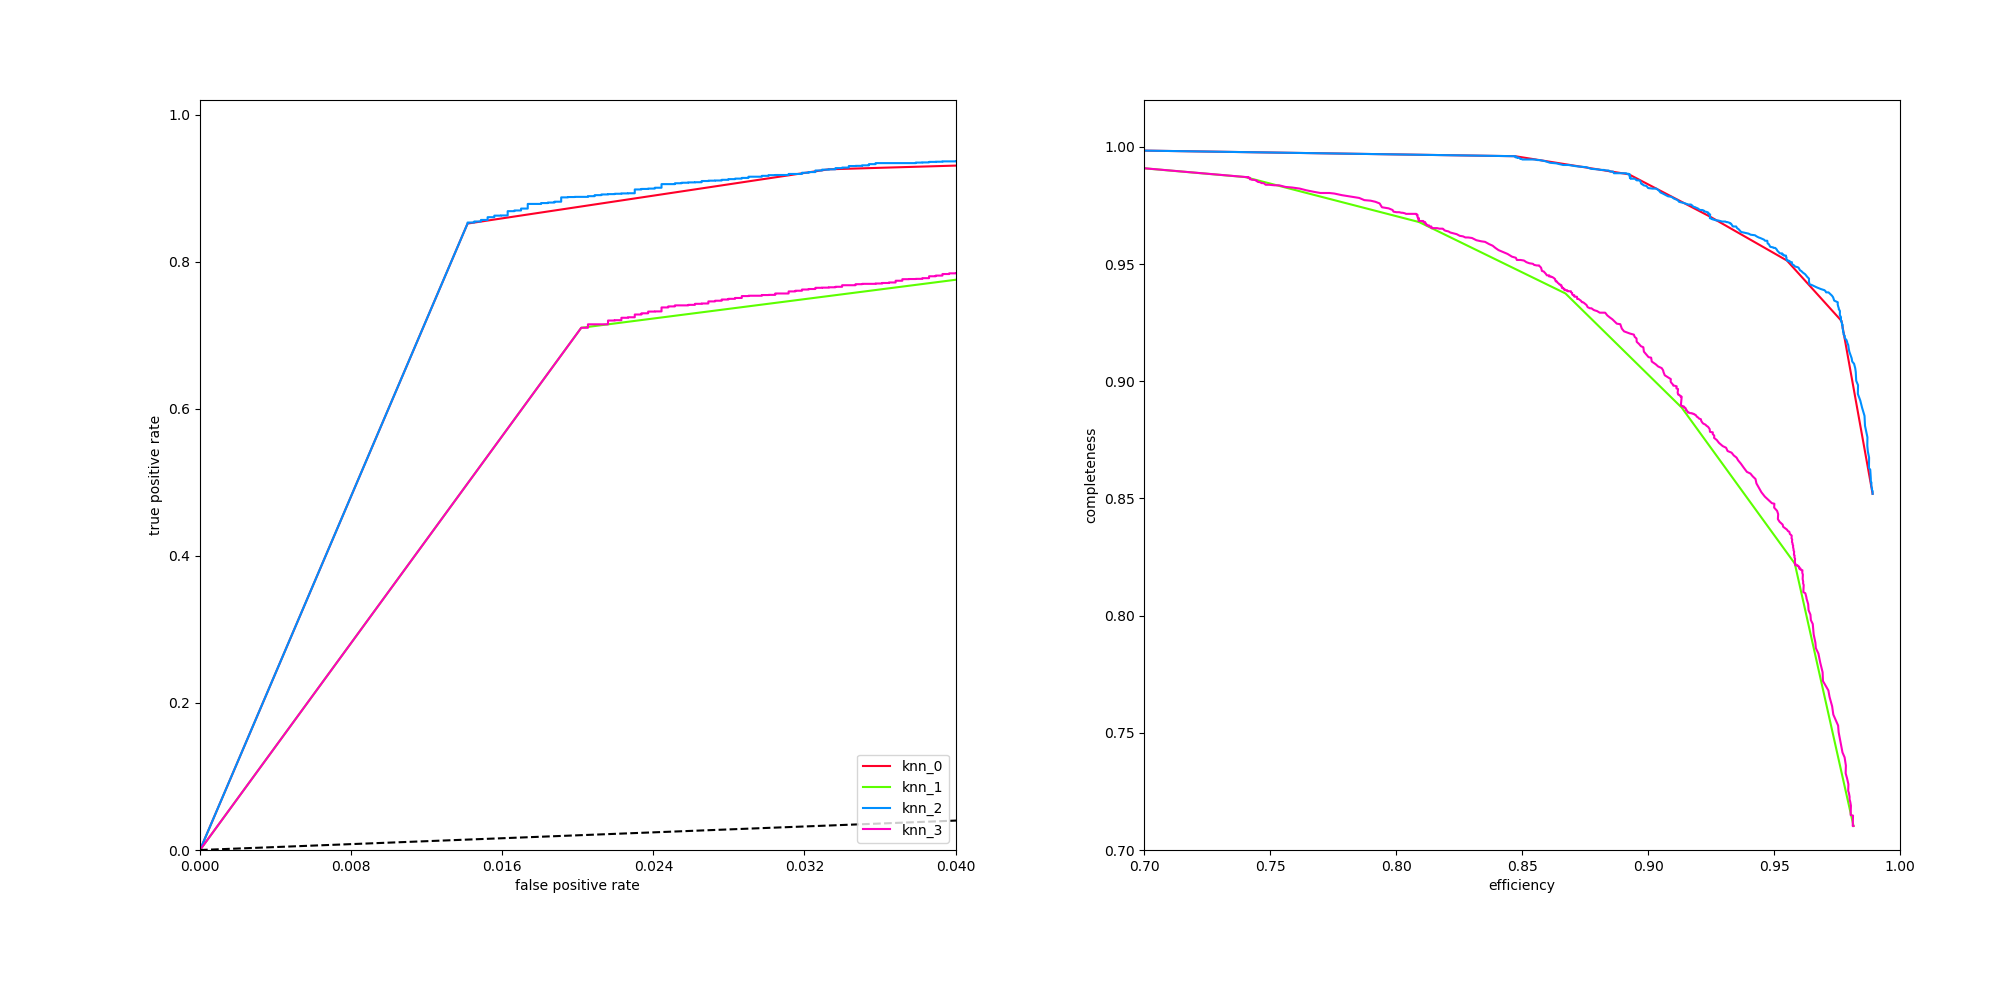

In [16]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_knn_0, y_probs_knn_1, y_probs_knn_2, y_probs_knn_3]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()